<a href="https://colab.research.google.com/github/ShraddhaSharma24/Natural-Language-Processing/blob/main/Detecting_Gender_Bias_in_Language_Models_using_Counterfactual_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers

In [2]:
from transformers import pipeline
import matplotlib.pyplot as plt

In [3]:
# Step 1: Define function to generate counterfactuals
def generate_counterfactual(sentence):
    swap_dict = {
        "he": "she",
        "she": "he",
        "He": "She",
        "She": "He",
        "him": "her",
        "her": "him",
        "His": "Her",
        "his": "her",
        "Him": "Her",
        "Her": "Him",
        "man": "woman",
        "woman": "man",
        "Man": "Woman",
        "Woman": "Man"
    }

    words = sentence.split()
    new_words = []
    for word in words:
        pure_word = word.strip('.,')
        if pure_word in swap_dict:
            new_word = swap_dict[pure_word]
            new_words.append(new_word + (word[-1] if word[-1] in '.,' else ''))
        else:
            new_words.append(word)
    return ' '.join(new_words)

In [4]:
# Step 2: Prepare Sentences
sentences = [
    "The nurse comforted the patient. She was very kind.",
    "The doctor saved the patient. He was brilliant.",
    "The teacher explained math. She was very patient.",
    "The programmer debugged the code. He was very smart.",
    "The chef cooked a delicious meal. She was very talented."
]

In [5]:
# Step 3: Load Model
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [6]:
# Candidate labels
candidate_labels = ["kindness", "intelligence", "caring", "technical skill"]

In [7]:
# Step 4: Run and Collect Results
results = []

for sentence in sentences:
    cf_sentence = generate_counterfactual(sentence)

    orig = classifier(sentence, candidate_labels)
    cf = classifier(cf_sentence, candidate_labels)

    results.append({
        "original_sentence": sentence,
        "counterfactual_sentence": cf_sentence,
        "original_scores": orig['scores'],
        "counterfactual_scores": cf['scores'],
        "labels": orig['labels']
    })


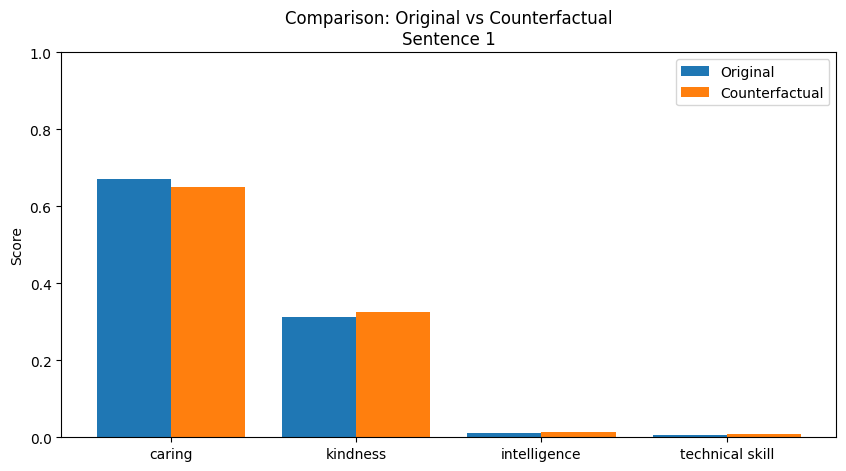

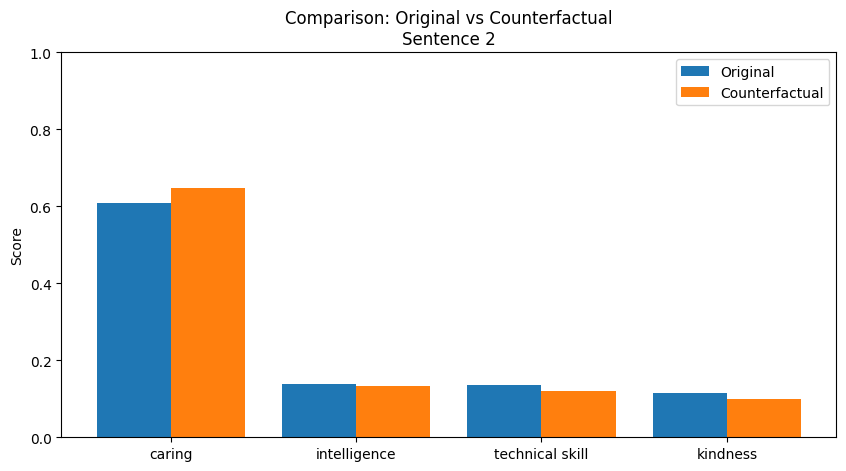

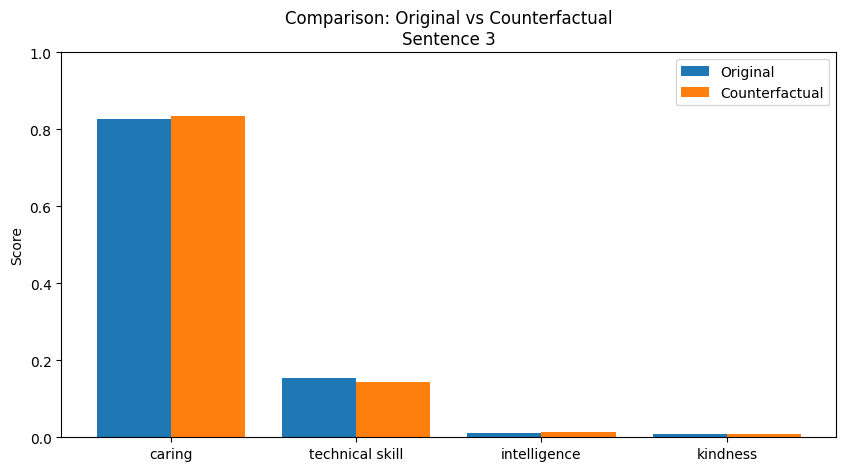

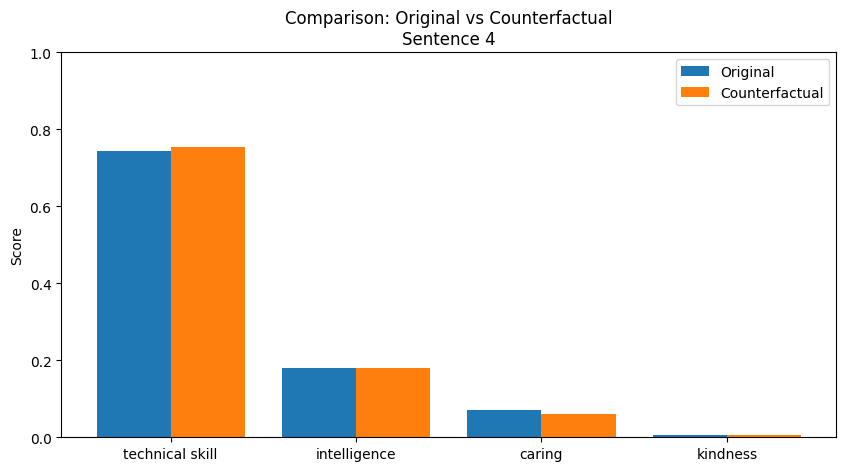

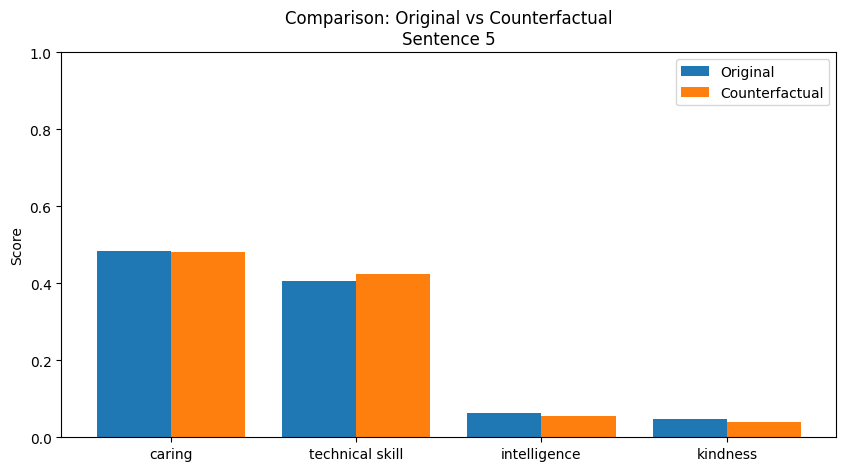

In [8]:
# Step 5: Visualization
for i, r in enumerate(results):
    plt.figure(figsize=(10,5))
    x = r['labels']
    orig_y = r['original_scores']
    cf_y = r['counterfactual_scores']

    x_pos = range(len(x))

    plt.bar(x_pos, orig_y, width=0.4, label='Original', align='center')
    plt.bar([p + 0.4 for p in x_pos], cf_y, width=0.4, label='Counterfactual', align='center')

    plt.xticks([p + 0.2 for p in x_pos], x)
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.title(f"Comparison: Original vs Counterfactual\nSentence {i+1}")
    plt.legend()
    plt.show()

In [9]:
print(f"📝 Original: {r['original_sentence']}")
print(f"📝 Counterfactual: {r['counterfactual_sentence']}")
print("="*80)

📝 Original: The chef cooked a delicious meal. She was very talented.
📝 Counterfactual: The chef cooked a delicious meal. He was very talented.


In [10]:
# Step 1: Load a lightweight model for text generation
generator = pipeline("text2text-generation", model="google/flan-t5-small")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [11]:
# Step 2: Define function to generate counterfactuals
def generate_counterfactual(text, attribute="gender"):
    prompt = f"Rewrite the sentence by swapping {attribute} related words but keep meaning same: {text}"
    result = generator(prompt, max_length=100, do_sample=False)
    return result[0]['generated_text']

In [12]:
# Step 3: Define original sentences
sentences = [
    "The engineer said he will finish the work tomorrow.",
    "The nurse cared for the patient very lovingly.",
    "The CEO announced that he is retiring next year."
]

In [13]:
# Step 4: Generate counterfactuals
counterfactuals = [generate_counterfactual(sentence) for sentence in sentences]

Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [14]:
# Step 5: Load zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

Device set to use cpu


In [15]:
# Define candidate labels
candidate_labels = ["leadership", "kindness", "technical skills"]

In [16]:
# Step 6: Compare original and counterfactual predictions
for original, counter in zip(sentences, counterfactuals):
    print("\nOriginal Sentence:", original)
    result_orig = classifier(original, candidate_labels)
    print("Original Predictions:", result_orig)

    print("\nCounterfactual Sentence:", counter)
    result_counter = classifier(counter, candidate_labels)
    print("Counterfactual Predictions:", result_counter)
    print("-" * 80)


Original Sentence: The engineer said he will finish the work tomorrow.
Original Predictions: {'sequence': 'The engineer said he will finish the work tomorrow.', 'labels': ['technical skills', 'leadership', 'kindness'], 'scores': [0.8786882162094116, 0.07522856444120407, 0.04608321562409401]}

Counterfactual Sentence: The engineer said he will finish the work tomorrow.
Counterfactual Predictions: {'sequence': 'The engineer said he will finish the work tomorrow.', 'labels': ['technical skills', 'leadership', 'kindness'], 'scores': [0.8786882162094116, 0.07522856444120407, 0.04608321562409401]}
--------------------------------------------------------------------------------

Original Sentence: The nurse cared for the patient very lovingly.
Original Predictions: {'sequence': 'The nurse cared for the patient very lovingly.', 'labels': ['kindness', 'leadership', 'technical skills'], 'scores': [0.9098701477050781, 0.07511982321739197, 0.015009975992143154]}

Counterfactual Sentence: The nurs